In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [2]:
# Currency pair exchange rates for CAD/JPY
cad_jpy_df = pd.read_csv(
    Path("cad_jpy.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)
cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1982-01-05,184.65,184.65,184.65,184.65
1982-01-06,185.06,185.06,185.06,185.06
1982-01-07,186.88,186.88,186.88,186.88
1982-01-08,186.58,186.58,186.58,186.58
1982-01-11,187.64,187.64,187.64,187.64


In [3]:
# Trim the dataset to begin on January 1st, 1990
cad_jpy_df = cad_jpy_df.loc["1990-01-01":, :]
cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1990-01-02,126.37,126.31,126.37,126.31
1990-01-03,125.30,125.24,125.30,125.24
1990-01-04,123.46,123.41,123.46,123.41
1990-01-05,124.54,124.48,124.54,124.48
1990-01-08,124.27,124.21,124.27,124.21


# Regression Analysis: Seasonal Effects with Sklearn Linear Regression


In [4]:
# Create a series using "Price" percentage returns, drop any nan"s, and check the results:
# (Make sure to multiply the pct_change() results by 100)
# In this case, you may have to replace inf, -inf values with np.nan"s
# YOUR CODE HERE!

cad_jpy_df['Price_Return']=cad_jpy_df['Price'].pct_change()*100
cad_jpy_df.dropna(inplace=True)
cad_jpy_df

,Price,Open,High,Low,Price_Return
Date,,,,,
1990-01-03,125.30,125.24,125.30,125.24,-0.846720
1990-01-04,123.46,123.41,123.46,123.41,-1.468476
1990-01-05,124.54,124.48,124.54,124.48,0.874777
1990-01-08,124.27,124.21,124.27,124.21,-0.216798
1990-01-09,125.10,125.04,125.10,125.04,0.667901
...,...,...,...,...,...
2020-05-29,78.29,78.21,78.41,77.75,0.076697
2020-06-01,79.27,78.21,79.36,78.04,1.251756
2020-06-02,80.40,79.26,80.56,79.15,1.425508


In [5]:
price_returns = cad_jpy_df.replace(-np.inf, np.nan).dropna()
price_returns

,Price,Open,High,Low,Price_Return
Date,,,,,
1990-01-03,125.30,125.24,125.30,125.24,-0.846720
1990-01-04,123.46,123.41,123.46,123.41,-1.468476
1990-01-05,124.54,124.48,124.54,124.48,0.874777
1990-01-08,124.27,124.21,124.27,124.21,-0.216798
1990-01-09,125.10,125.04,125.10,125.04,0.667901
...,...,...,...,...,...
2020-05-29,78.29,78.21,78.41,77.75,0.076697
2020-06-01,79.27,78.21,79.36,78.04,1.251756
2020-06-02,80.40,79.26,80.56,79.15,1.425508


In [6]:
price_returns['Lagged_Return'] = price_returns.Price_Return.shift()
#price_returns['Price_Difference'] = price_returns.Price_Return.diff()
price_returns.dropna(inplace=True)
price_returns

,Price,Open,High,Low,Price_Return,Lagged_Return
Date,,,,,,
1990-01-04,123.46,123.41,123.46,123.41,-1.468476,-0.846720
1990-01-05,124.54,124.48,124.54,124.48,0.874777,-1.468476
1990-01-08,124.27,124.21,124.27,124.21,-0.216798,0.874777
1990-01-09,125.10,125.04,125.10,125.04,0.667901,-0.216798
1990-01-10,125.81,125.75,125.81,125.75,0.567546,0.667901
...,...,...,...,...,...,...
2020-05-29,78.29,78.21,78.41,77.75,0.076697,-0.114913
2020-06-01,79.27,78.21,79.36,78.04,1.251756,0.076697
2020-06-02,80.40,79.26,80.56,79.15,1.425508,1.251756


In [7]:
# Create a train/test split for the data using 2018-2019 for testing and the rest for training
train = price_returns[:'2017']
test = price_returns['2018':]

In [8]:
x_train = train['Lagged_Return'].to_frame()
x_test= test['Lagged_Return'].to_frame()
y_train= train ['Price_Return'].to_frame()
y_test = test['Price_Return'].to_frame()

In [9]:
x_train

,Lagged_Return
Date,
1990-01-04,-0.846720
1990-01-05,-1.468476
1990-01-08,0.874777
1990-01-09,-0.216798
1990-01-10,0.667901
...,...
2017-12-25,-0.011240
2017-12-26,0.033723
2017-12-27,0.269693


In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
#regress = LinearRegression().fit(x_train, y_train)
reg= LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [12]:
y_test.head()

,Price_Return
Date,
2018-01-01,0.245591
2018-01-02,-0.055679
2018-01-03,0.011142
2018-01-04,0.601604
2018-01-05,0.919158


In [13]:
# Make a prediction of "y" values using just the test dataset
predic = reg.predict(x_test)
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
output= y_test
output

,Price_Return
Date,
2018-01-01,0.245591
2018-01-02,-0.055679
2018-01-03,0.011142
2018-01-04,0.601604
2018-01-05,0.919158
...,...
2020-05-29,0.076697
2020-06-01,1.251756
2020-06-02,1.425508


In [14]:
output['Predicted_Return']=predic
output

,Price_Return,Predicted_Return
Date,,
2018-01-01,0.245591,0.005434
2018-01-02,-0.055679,-0.007317
2018-01-03,0.011142,0.000340
2018-01-04,0.601604,-0.001358
2018-01-05,0.919158,-0.016366
...,...,...
2020-05-29,0.076697,0.001846
2020-06-01,1.251756,-0.003024
2020-06-02,1.425508,-0.032890


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

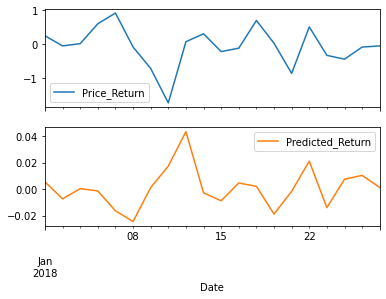

In [15]:
# Plot the first 20 predictions vs the true values
output[:20].plot(subplots=True)

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
MSE=mean_squared_error(output['Price_Return'],output['Predicted_Return'])
MSE

0.415484105880405

In [18]:
# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
RMSE=np.sqrt(MSE)
print(f" The Root Mean Squared Error is {RMSE}")

 The Root Mean Squared Error is 0.6445805658569028


In [19]:
# Construct a dataframe using just the "y" training data:
trainoutput=y_train
trainoutput['Train_Predictions'] = reg.predict(x_train)
trainoutput

,Price_Return,Train_Predictions
Date,,
1990-01-04,-1.468476,0.020446
1990-01-05,0.874777,0.036249
1990-01-08,-0.216798,-0.023309
1990-01-09,0.667901,0.004436
1990-01-10,0.567546,-0.018051
...,...,...
2017-12-25,0.033723,-0.000789
2017-12-26,0.269693,-0.001932
2017-12-27,0.392245,-0.007929


In [20]:
MSEtrain=mean_squared_error(trainoutput['Price_Return'],trainoutput['Train_Predictions'])
MSEtrain

0.708954961822499

In [21]:
RMSEtrain=np.sqrt(MSEtrain)
print(f" The In-sample Root Mean Squared Error is {RMSEtrain}")

 The In-sample Root Mean Squared Error is 0.841994632894117


# Return Forecasting: Time Series Analysis & Modelling with CAD-PHY Exchange rate data.

## Initial Time-Series Plotting

<AxesSubplot:xlabel='Date'>

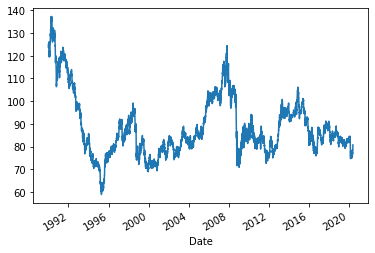

In [22]:
# Plot just the "Price" column from the dataframe:
cad_jpy_df.Price.plot()

## Decomposition Using a Hodrick-Prescott Filter

In [23]:
import statsmodels.api as sm

In [24]:
# Apply the Hodrick-Prescott Filter by decomposing the exchange rate price into two separate series:
ts_noise, ts_trend = sm.tsa.filters.hpfilter(cad_jpy_df['Price']) 

In [25]:
ts_trend.to_frame()

,Price_trend
Date,
1990-01-03,125.563973
1990-01-04,125.407267
1990-01-05,125.250395
1990-01-08,125.091977
1990-01-09,124.930186
...,...
2020-05-29,78.793961
2020-06-01,79.051061
2020-06-02,79.311883


In [26]:
ts_noise.to_frame()

,Price_cycle
Date,
1990-01-03,-0.263973
1990-01-04,-1.947267
1990-01-05,-0.710395
1990-01-08,-0.821977
1990-01-09,0.169814
...,...
2020-05-29,-0.503961
2020-06-01,0.218939
2020-06-02,1.088117


In [27]:
# Create a dataframe of just the exchange rate price, and add columns for "noise" and "trend" series from above:
Combineddf=cad_jpy_df['Price']
Combineddf

Date
1990-01-03    125.30
1990-01-04    123.46
1990-01-05    124.54
1990-01-08    124.27
1990-01-09    125.10
               ...  
2020-05-29     78.29
2020-06-01     79.27
2020-06-02     80.40
2020-06-03     80.70
2020-06-04     80.71
Name: Price, Length: 7928, dtype: float64

In [28]:
dfnoise=pd.merge(Combineddf,ts_noise,how='inner', left_on=Combineddf.index, right_on= ts_noise.index)
dfnoise

,key_0,Price,Price_cycle
0,1990-01-03,125.30,-0.263973
1,1990-01-04,123.46,-1.947267
2,1990-01-05,124.54,-0.710395
3,1990-01-08,124.27,-0.821977
4,1990-01-09,125.10,0.169814
...,...,...,...
7923,2020-05-29,78.29,-0.503961
7924,2020-06-01,79.27,0.218939
7925,2020-06-02,80.40,1.088117
7926,2020-06-03,80.70,1.125501


In [29]:
dfnoise=dfnoise.set_index(['key_0'])
dfnoise.index.names = ['Date']

In [30]:
dfnoise

,Price,Price_cycle
Date,,
1990-01-03,125.30,-0.263973
1990-01-04,123.46,-1.947267
1990-01-05,124.54,-0.710395
1990-01-08,124.27,-0.821977
1990-01-09,125.10,0.169814
...,...,...
2020-05-29,78.29,-0.503961
2020-06-01,79.27,0.218939
2020-06-02,80.40,1.088117


In [31]:
dfnoise.rename(columns={"Price_cycle":"Noise"},inplace=True)
dfnoise

,Price,Noise
Date,,
1990-01-03,125.30,-0.263973
1990-01-04,123.46,-1.947267
1990-01-05,124.54,-0.710395
1990-01-08,124.27,-0.821977
1990-01-09,125.10,0.169814
...,...,...
2020-05-29,78.29,-0.503961
2020-06-01,79.27,0.218939
2020-06-02,80.40,1.088117


In [32]:
totaldf=pd.merge(dfnoise,ts_trend,how='inner', left_on=dfnoise.index, right_on= ts_trend.index)
totaldf

,key_0,Price,Noise,Price_trend
0,1990-01-03,125.30,-0.263973,125.563973
1,1990-01-04,123.46,-1.947267,125.407267
2,1990-01-05,124.54,-0.710395,125.250395
3,1990-01-08,124.27,-0.821977,125.091977
4,1990-01-09,125.10,0.169814,124.930186
...,...,...,...,...
7923,2020-05-29,78.29,-0.503961,78.793961
7924,2020-06-01,79.27,0.218939,79.051061
7925,2020-06-02,80.40,1.088117,79.311883
7926,2020-06-03,80.70,1.125501,79.574499


In [33]:
totaldf=totaldf.set_index(['key_0'])
totaldf.index.names = ['Date']

In [34]:
totaldf.rename(columns={"Price_trend":"Trend"},inplace=True)
totaldf

,Price,Noise,Trend
Date,,,
1990-01-03,125.30,-0.263973,125.563973
1990-01-04,123.46,-1.947267,125.407267
1990-01-05,124.54,-0.710395,125.250395
1990-01-08,124.27,-0.821977,125.091977
1990-01-09,125.10,0.169814,124.930186
...,...,...,...
2020-05-29,78.29,-0.503961,78.793961
2020-06-01,79.27,0.218939,79.051061
2020-06-02,80.40,1.088117,79.311883


In [35]:
# Plot the Exchange Rate Price vs. the Trend for 2015 to the present
exchtrend=totaldf.loc['2015':]
exchtrend

,Price,Noise,Trend
Date,,,
2015-01-01,103.12,1.523927,101.596073
2015-01-02,102.25,0.945717,101.304283
2015-01-05,101.70,0.708200,100.991800
2015-01-06,100.04,-0.620865,100.660865
2015-01-07,100.93,0.615839,100.314161
...,...,...,...
2020-05-29,78.29,-0.503961,78.793961
2020-06-01,79.27,0.218939,79.051061
2020-06-02,80.40,1.088117,79.311883


In [36]:
exchtrend.drop(columns=['Noise'], inplace=True)
exchtrend

,Price,Trend
Date,,
2015-01-01,103.12,101.596073
2015-01-02,102.25,101.304283
2015-01-05,101.70,100.991800
2015-01-06,100.04,100.660865
2015-01-07,100.93,100.314161
...,...,...
2020-05-29,78.29,78.793961
2020-06-01,79.27,79.051061
2020-06-02,80.40,79.311883


<AxesSubplot:title={'center':'Price vs. Trend'}, xlabel='Date'>

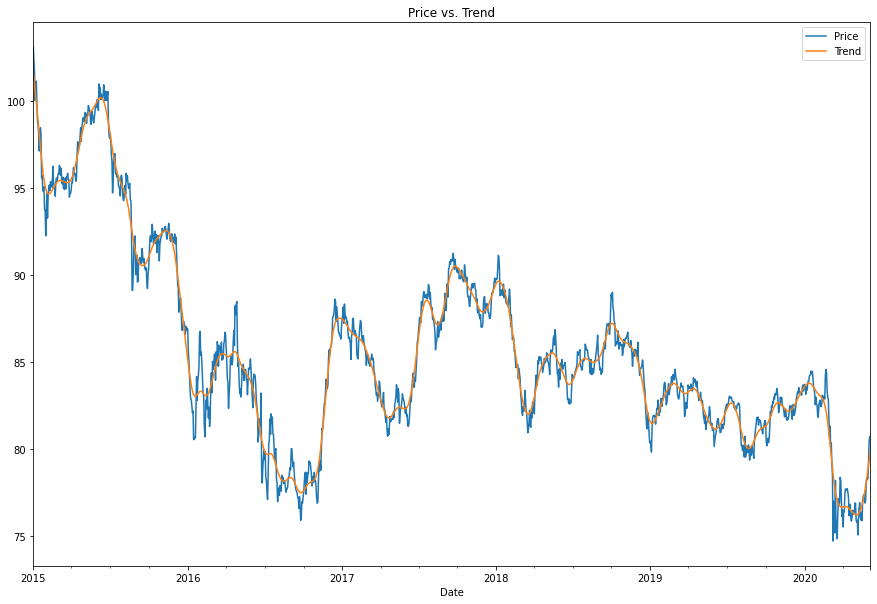

In [41]:
exchtrend.plot(figsize=(15,10), title='Price vs. Trend', xlabel='Date')

<AxesSubplot:xlabel='Date'>

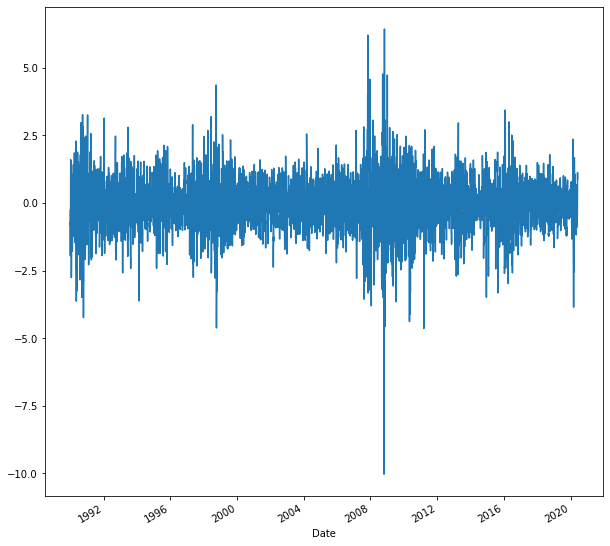

In [44]:
# Plot the Settle Noise
totaldf.Noise.plot(figsize=(10,10))

## Forecasting Returns using an ARMA Model

In [45]:
# Create a series using "Price" percentage returns, drop any nan"s, and check the results:
# (Make sure to multiply the pct_change() results by 100)
# In this case, you may have to replace inf, -inf values with np.nan"s
returns = (cad_jpy_df[["Price"]].pct_change() * 100)
returns = returns.replace(-np.inf, np.nan).dropna()
returns.tail()

,Price
Date,
2020-05-29,0.076697
2020-06-01,1.251756
2020-06-02,1.425508
2020-06-03,0.373134
2020-06-04,0.012392


In [47]:
import statsmodels.api as sm

In [50]:
# Estimate and ARMA model using statsmodels (use order=(2, 1))

from statsmodels.tsa.arima_model import ARMA
arma=ARMA(returns.values, order=(2,1))

# Fit the model and assign it to a variable called results
armaresults = arma.fit() 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23010D+00    |proj g|=  1.72884D-04

At iterate    5    f=  1.23010D+00    |proj g|=  3.77032D-05

At iterate   10    f=  1.23010D+00    |proj g|=  5.96811D-04


 This problem is unconstrained.



At iterate   15    f=  1.23008D+00    |proj g|=  3.79454D-03

At iterate   20    f=  1.23006D+00    |proj g|=  1.37401D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     36      1     0     0   1.332D-07   1.230D+00
  F =   1.2300576177614284     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [51]:
armaresults.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 7927
Model:                     ARMA(2, 1)   Log Likelihood               -9750.667
Method:                       css-mle   S.D. of innovations              0.828
Date:                Sat, 30 Apr 2022   AIC                          19511.333
Time:                        15:26:07   BIC                          19546.224
Sample:                             0   HQIC                         19523.281
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0021      0.009     -0.233      0.816      -0.020       0.016
ar.L1.y       -0.8537      0.165     -5.181      0.000      -1.177      -0.531
ar.L2.y       -0.0198      0.013     -1.480      0.139      -0.046       0.006
ma.L1.y        0.8233      0.164      5.010      0.000       0.501       1.145
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2051           +0.0000j            1.2051            0.5000
AR.2          -41.8734           +0.0000j           41.8734            0.5000
MA.1           -1.2146           +0.0000j            1.2146            0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:title={'center':'5 Day Return Forecast'}>

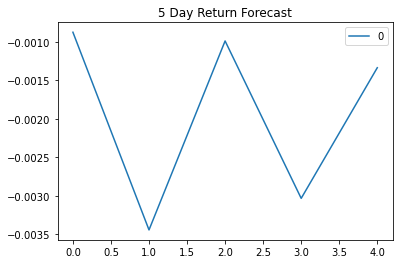

In [52]:
# Plot the 5 Day Returns Forecast
pd.DataFrame(armaresults.forecast(steps=5)[0]).plot(title="5 Day Return Forecast") 

## Forecasting the Exchange Rate Price using an ARIMA Model

In [53]:
from statsmodels.tsa.arima_model import ARIMA

In [54]:
# Estimate and ARIMA Model:
# Hint: ARIMA(df, order=(p, d, q))
arimamodel = ARIMA(cad_jpy_df['Price'], order=(5, 1, 1)) 
# Fit the model
arimaresults = arimamodel.fit() 

/Users/amiraali/opt/anaconda3/envs/pyvizenv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/amiraali/opt/anaconda3/envs/pyvizenv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10305D+00    |proj g|=  2.28551D-04

At iterate    5    f=  1.10305D+00    |proj g|=  3.65707D-05

At iterate   10    f=  1.10305D+00    |proj g|=  4.81659D-04

At iterate   15    f=  1.10305D+00    |proj g|=  2.79998D-04


 This problem is unconstrained.



At iterate   20    f=  1.10305D+00    |proj g|=  7.77156D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     23     26      1     0     0   2.220D-08   1.103D+00
  F =   1.1030454849752100     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [55]:
arimaresults.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Price   No. Observations:                 7927
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -8743.842
Method:                       css-mle   S.D. of innovations              0.729
Date:                Sat, 30 Apr 2022   AIC                          17503.683
Time:                        15:32:26   BIC                          17559.507
Sample:                             1   HQIC                         17522.800
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0056      0.008     -0.726      0.468      -0.021       0.010
ar.L1.D.Price     0.4302      0.248      1.734      0.083      -0.056       0.916
ar.L2.D.Price     0.0183      0.014      1.294      0.196      -0.009       0.046
ar.L3.D.Price    -0.0120      0.012     -0.973      0.330      -0.036       0.012
ar.L4.D.Price     0.0112      0.012      0.899      0.368      -0.013       0.036
ar.L5.D.Price    -0.0191      0.011     -1.697      0.090      -0.041       0.003
ma.L1.D.Price    -0.4587      0.248     -1.850      0.064      -0.945       0.027
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.7694           -0.7659j            1.9281           -0.0650
AR.2            1.7694           +0.7659j            1.9281            0.0650
AR.3           -2.3631           -0.0000j            2.3631           -0.5000
AR.4           -0.2940           -2.4243j            2.4421           -0.2692
AR.5           -0.2940           +2.4243j            2.4421            0.2692
MA.1            2.1800           +0.0000j            2.1800            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:title={'center':'5 Day Price Forecast'}>

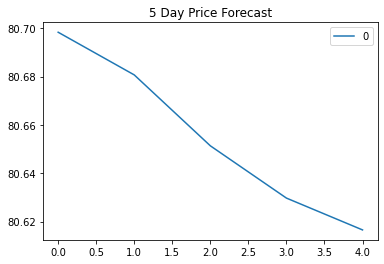

In [56]:
# Plot the 5 Day Price Forecast
pd.DataFrame(arimaresults.forecast(steps=5)[0]).plot(title="5 Day Price Forecast") 

## Volatility Forecasting with GARCH

In [60]:
pip install arch

     |████████████████████████████████| 877 kB 3.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [61]:
from arch import arch_model

In [63]:
# Estimate a GARCH model:
garchmodel = arch_model(returns, mean="Zero", vol="GARCH", p=2, q=1) 
# Fit the model
res = garchmodel.fit(disp="on") 

Iteration:      1,   Func. Count:      6,   Neg. LLF: 46542.04597178945
Iteration:      2,   Func. Count:     16,   Neg. LLF: 365917538.276387
Iteration:      3,   Func. Count:     22,   Neg. LLF: 8927.589604015626
Iteration:      4,   Func. Count:     27,   Neg. LLF: 11768.118588805075
Iteration:      5,   Func. Count:     33,   Neg. LLF: 10426.001975440686
Iteration:      6,   Func. Count:     41,   Neg. LLF: 8915.131011729303
Iteration:      7,   Func. Count:     47,   Neg. LLF: 8909.854972697169
Iteration:      8,   Func. Count:     52,   Neg. LLF: 8909.770222720439
Iteration:      9,   Func. Count:     57,   Neg. LLF: 8909.76485755451
Iteration:     10,   Func. Count:     62,   Neg. LLF: 8909.763854688306
Iteration:     11,   Func. Count:     67,   Neg. LLF: 8909.763652888367
Iteration:     12,   Func. Count:     72,   Neg. LLF: 8909.763620300077
Iteration:     13,   Func. Count:     76,   Neg. LLF: 8909.76362030271


In [64]:
res.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8909.76
Distribution:                  Normal   AIC:                           17827.5
Method:            Maximum Likelihood   BIC:                           17855.4
                                        No. Observations:                 7927
Date:                Sat, Apr 30 2022   Df Residuals:                     7927
Time:                        15:38:47   Df Model:                            0
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      9.0704e-03  2.544e-03      3.566  3.625e-04  [4.085e-03,1.406e-02]
alpha[1]       0.0624  1.835e-02      3.402  6.681e-04  [2.647e-02,9.839e-02]
alpha[2]       0.0000  2.009e-02      0.000      1.000 [-3.939e-02,3.939e-02]
beta[1]        0.9243  1.229e-02     75.235      0.000      [  0.900,  0.948]
=============================================================================

Covariance estimator: robust
"""

In [65]:
# Find the last day of the dataset
last_day = returns.index.max().strftime('%Y-%m-%d')
last_day

'2020-06-04'

In [67]:
 # Create a 5 day forecast of volatility
forecast_horizon = 5

# Start the forecast using the last_day calculated above
garchforecast=res.forecast(start=last_day,horizon=forecast_horizon)

In [69]:
# Annualize the forecast
intermediate = np.sqrt(garchforecast.variance.dropna() * 252)
intermediate.head()

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2020-06-04,12.566465,12.574155,12.581737,12.589215,12.596589


In [70]:
# Transpose the forecast so that it is easier to plot
final = intermediate.dropna().T
final.head()

Date,2020-06-04
h.1,12.566465
h.2,12.574155
h.3,12.581737
h.4,12.589215
h.5,12.596589


<AxesSubplot:>

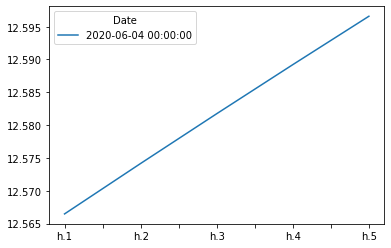

In [71]:
# Plot the final forecast
final.plot()